# Starbucks - Nutrition Facts and Analysis

## Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the Dataset**
3. **Data Visualizations:**

# Importing Libraries

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress deprecation and incorrect usage warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

### * Load data into a Pandas DataFrame

In [3]:
df = pd.read_csv('/kaggle/input/starbucks-menu/starbucks_drinkMenu_expanded.csv', encoding="ISO-8859-1", low_memory=False)
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,Strawberries & CrÃ¨me (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


### * Print the Datatypes of the dataset

In [4]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


### Column Names

In [9]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.1,0.5,2.00,9.0
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.0,0.0,0.10,0.3
Sodium (mg),242.0,6.363636,8.630257,0.0,0.0,5.0,10.00,40.0
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.0,125.0,170.00,340.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.0,0.0,1.00,8.0
Sugars (g),242.0,32.962810,19.730199,0.0,18.0,32.0,43.75,84.0
Protein (g),242.0,6.978512,4.871659,0.0,3.0,6.0,10.00,20.0


In [11]:
df.groupby('Beverage_category').mean()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
Beverage_category,,,,,,,,,
Classic Espresso Drinks,140.172414,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Coffee,4.250000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000
FrappuccinoÂ® Blended Coffee,276.944444,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
FrappuccinoÂ® Blended CrÃ¨me,233.076923,0.769231,0.038462,4.230769,188.846154,49.923077,0.307692,48.461538,4.000000
FrappuccinoÂ® Light Blended Coffee,162.500000,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Shaken Iced Beverages,114.444444,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Signature Espresso Drinks,250.000000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Smoothies,282.222222,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
TazoÂ® Tea Drinks,177.307692,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692


In [12]:
#check for the null values in each column
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

# Data Visualizations

In [13]:
import seaborn as sns

In [14]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'TazoÂ® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'FrappuccinoÂ® Blended Coffee',
       'FrappuccinoÂ® Light Blended Coffee',
       'FrappuccinoÂ® Blended CrÃ¨me'], dtype=object)

In [15]:
df.calories = df[['Beverage_category','Calories']]
df.calories.columns = ['DrinkMenu', 'Calories']
df.calories

,DrinkMenu,Calories
0,Coffee,3
1,Coffee,4
2,Coffee,5
3,Coffee,5
4,Classic Espresso Drinks,70
...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,320
238,FrappuccinoÂ® Blended CrÃ¨me,170
239,FrappuccinoÂ® Blended CrÃ¨me,200
240,FrappuccinoÂ® Blended CrÃ¨me,180


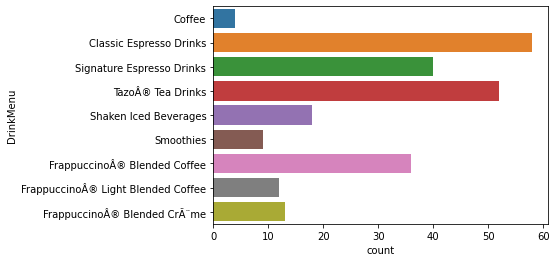

In [16]:
sns.countplot(y='DrinkMenu', data=df.calories)

In [17]:
#Create a DataFrame to see number of drinks by Beverage_category
#assign "BeverageCategory" as index 
df_beverage = pd.DataFrame(df['Beverage_category'].value_counts())
df_beverage['BeverageCategory'] = df_beverage.index
df_beverage.columns = ['NumberofDrinks', 'BeverageCategory']
df_beverage = df_beverage.reset_index().drop('index', axis=1)
df_beverage.head()

,NumberofDrinks,BeverageCategory
0,58,Classic Espresso Drinks
1,52,TazoÂ® Tea Drinks
2,40,Signature Espresso Drinks
3,36,FrappuccinoÂ® Blended Coffee
4,18,Shaken Iced Beverages


In [18]:
#high calories
df.calories.sort_values("Calories", ascending=False)

,DrinkMenu,Calories
84,Signature Espresso Drinks,510
215,FrappuccinoÂ® Blended Coffee,460
85,Signature Espresso Drinks,460
83,Signature Espresso Drinks,450
128,TazoÂ® Tea Drinks,450
...,...,...
0,Coffee,3
105,TazoÂ® Tea Drinks,0
104,TazoÂ® Tea Drinks,0
103,TazoÂ® Tea Drinks,0


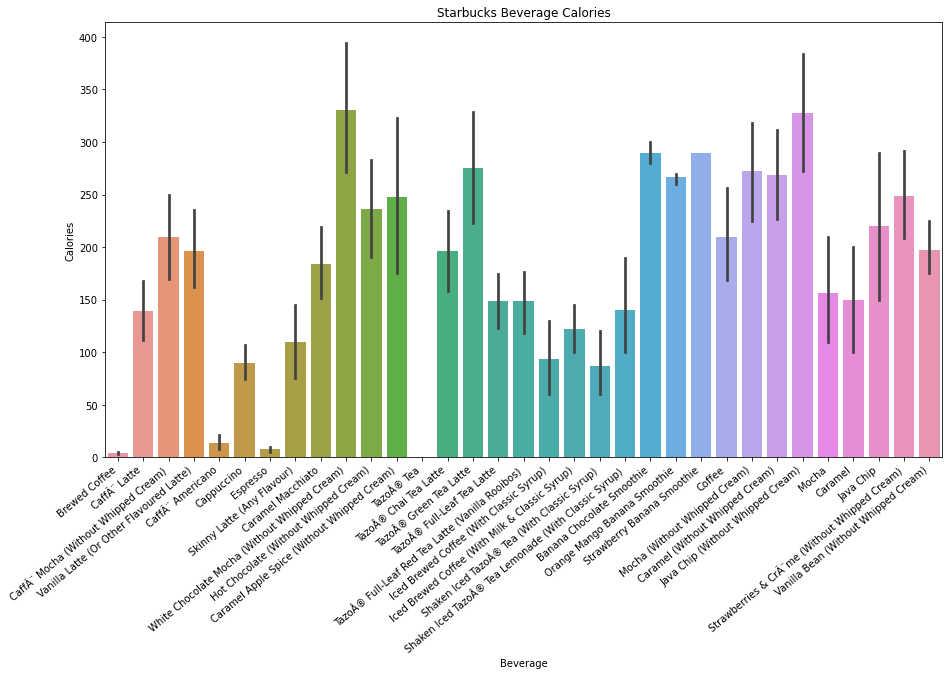

In [19]:
# data visualization highest calories
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Calories", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Calories")
plt.show()

* Overall, White chocolate mocha (without whipped cream), followed by Java Chip (Without Whipped Cream) out of the entire starbucks drinks. Caffe Mocha (without whipped cream) has the highest kcal, followed by vanilla latte(or other flavoured latte) from the Starbucks classic espresso drinks.

In [20]:
#highest Cholestrol
df.sort_values("Cholesterol (mg)", ascending=False)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
215,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
214,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
216,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
196,FrappuccinoÂ® Blended Coffee,Mocha (Without Whipped Cream),Venti Nonfat Milk,340,1,0.5,0.0,5,300,80,1,76,7.0,10%,0%,15%,10%,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
105,TazoÂ® Tea Drinks,TazoÂ® Tea,Venti,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


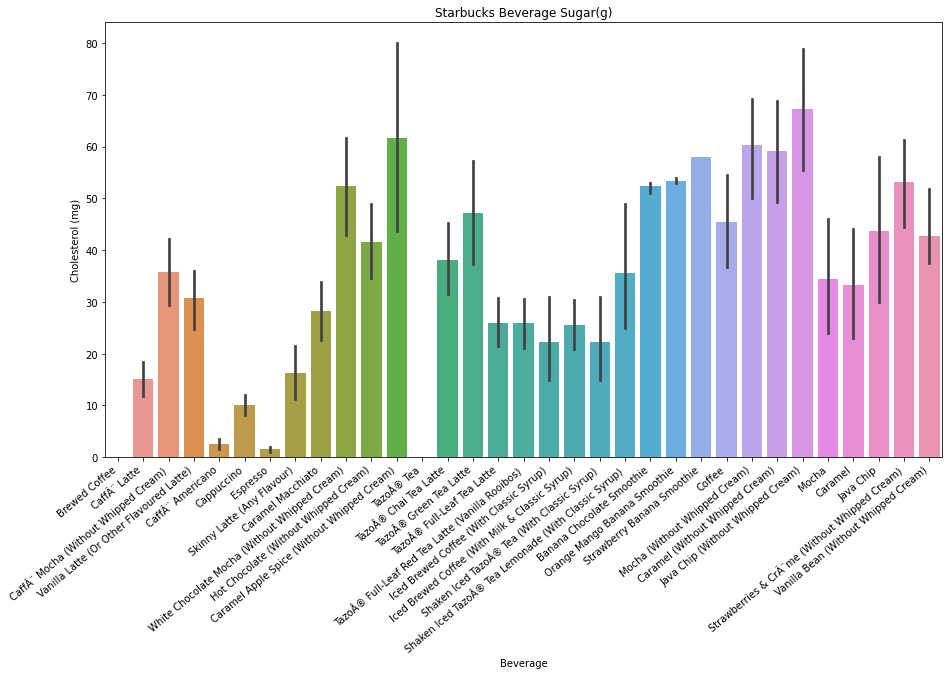

In [21]:
# data visualization high cholestrol
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Cholesterol (mg)", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

In [22]:
#highest sugars
df.sort_values(" Sugars (g)", ascending=False)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
214,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
216,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
206,FrappuccinoÂ® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,3.0,0.1,15,300,78,0,77,5.0,8%,0%,15%,2%,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Classic Espresso Drinks,Espresso,Solo,5,0,0.0,0.0,0,0,1,0,0,0.4,0%,0%,0%,0%,75
57,Classic Espresso Drinks,Espresso,Doppio,10,0,0.0,0.0,0,1,2,0,0,1.0,0%,0%,0%,0%,150
102,TazoÂ® Tea Drinks,TazoÂ® Tea,Short,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,TazoÂ® Tea Drinks,TazoÂ® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


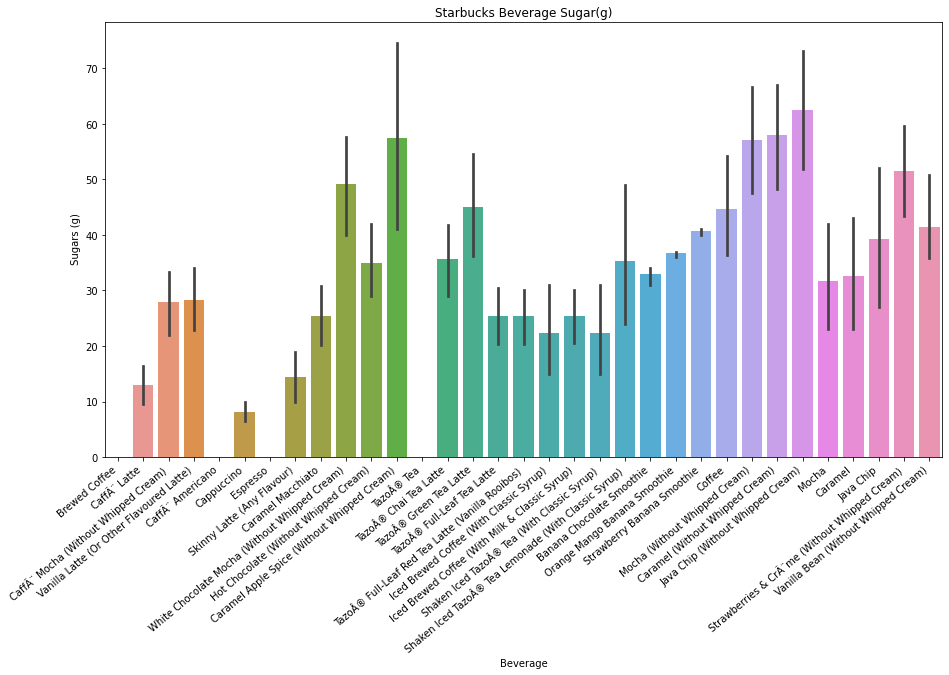

In [23]:
# data visualization high Sugars
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y=" Sugars (g)", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

* FrappuccinoÂ® Blended Coffee in venti size has the highest sugar content than Classic Espresso Drinks, TazoÂ® Tea Drinks, Coffee.

## Plot Historgram 

Text(0, 0.5, 'Count')

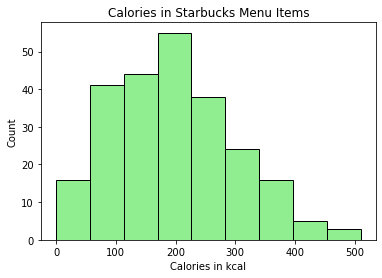

In [25]:
#plot a historgram of calories
calories = df["Calories"]
plt.hist(calories, bins=9, edgecolor = "black", color = "lightgreen")
plt.title("Calories in Starbucks Menu Items")
plt.xlabel("Calories in kcal")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

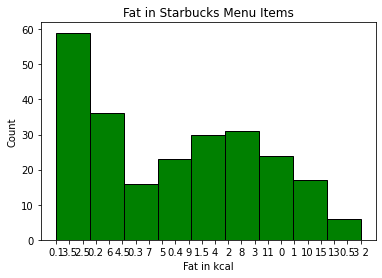

In [26]:
#plot a historgram of total fat(g)
fat = df[" Total Fat (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "green")
plt.title("Fat in Starbucks Menu Items")
plt.xlabel("Fat in kcal")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

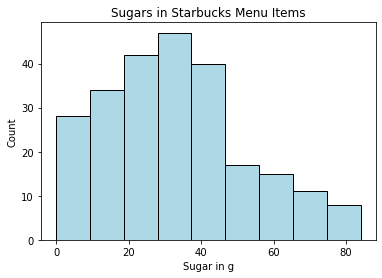

In [27]:
#plot a historgram of sugar data
fat = df[" Sugars (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "lightblue")
plt.title("Sugars in Starbucks Menu Items")
plt.xlabel("Sugar in g")
plt.ylabel("Count")

## Correlation between Diffrenet Variables

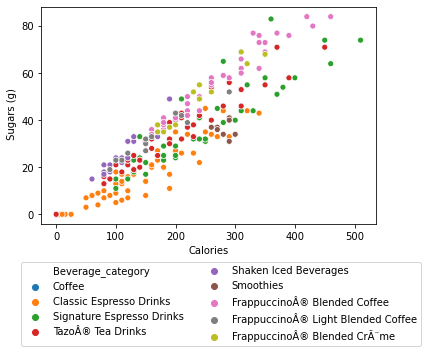

In [30]:
# Calories vs Sugars (g)
sns.scatterplot(data=df, x="Calories", y=" Sugars (g)", hue="Beverage_category")
plt.legend(loc="left", bbox_to_anchor=(1.15, -0.15), ncol= 2)

* There is correlation between calories and sugars. 

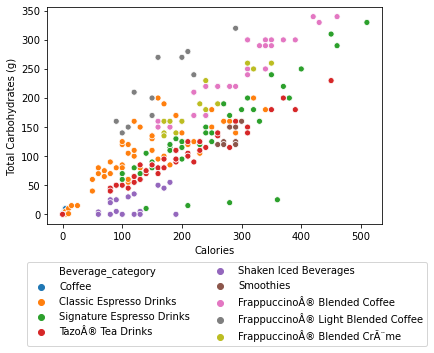

In [31]:
# Calories vs Total Carbohydrates
sns.scatterplot(data=df, x="Calories", y=" Total Carbohydrates (g) ",hue="Beverage_category")
plt.legend(loc="left", bbox_to_anchor=(1.15, -0.15), ncol= 2)
plt.show()

* There is correlation between calories and total carbohydrates 

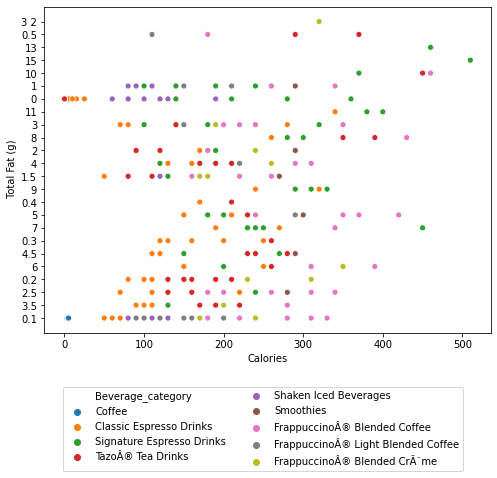

In [32]:
# Calories vs Total Fat (g)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Calories", y=" Total Fat (g)", hue="Beverage_category")
plt.legend(loc="left", bbox_to_anchor=(0.95, -0.15), ncol= 2)
plt.show()

# Map of Correlation betweeen Different Variables

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

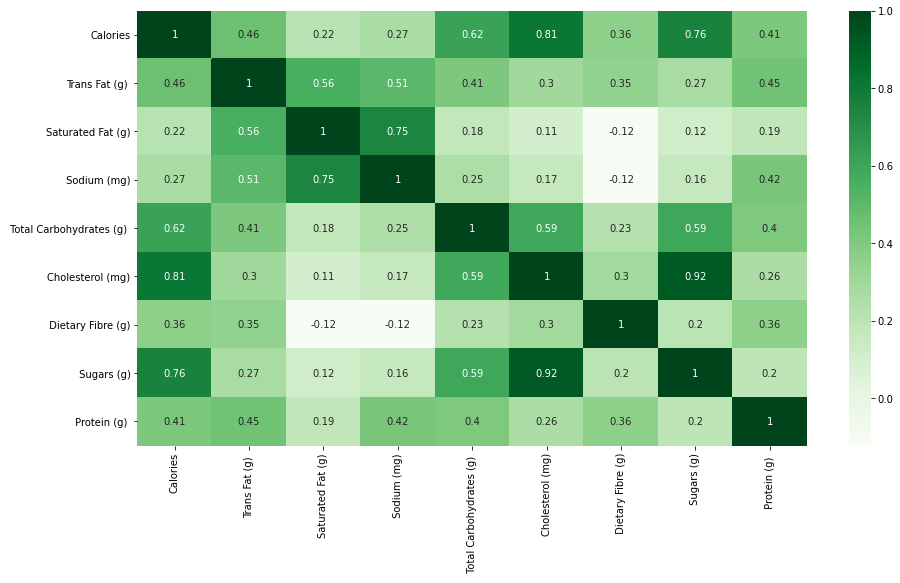

In [33]:
#Get correlation between different variables 
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="Greens")
df.columns

In [34]:
df.columns=['Bev_category', 'Beverage', 'Bev_prep', 'Calories', 'Total_Fat', 'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol', 'Dietary_Fiber', 'Sugars', 'Protein', 'Vit_A', 'Vit_C', 'Calcium', 'Iron', 'Caffeine']
df.columns


Index(['Bev_category', 'Beverage', 'Bev_prep', 'Calories', 'Total_Fat',
       'Trans_Fat', 'Sat_Fat', 'Sodium', 'Total_carbs', 'Cholesterol',
       'Dietary_Fiber', 'Sugars', 'Protein', 'Vit_A', 'Vit_C', 'Calcium',
       'Iron', 'Caffeine'],
      dtype='object')

In [35]:
sorted = df.sort_values("Protein", ascending=False)
sorted.head()

,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies
173,Smoothies,Banana Chocolate Smoothie,2% Milk,300,5,2.5,0.1,15,160,53,7,34,20.0,8%,15%,20%,20%,15
174,Smoothies,Banana Chocolate Smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6%,15%,20%,20%,15
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150


In [36]:
df[(df['Calories'] >= 20) & (df['Total_carbs'] > 20)].sort_values(by=['Calories', 'Total_carbs'], ascending=False)


,Bev_category,Beverage,Bev_prep,Calories,Total_Fat,Trans_Fat,Sat_Fat,Sodium,Total_carbs,Cholesterol,Dietary_Fiber,Sugars,Protein,Vit_A,Vit_C,Calcium,Iron,Caffeine
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
215,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
128,TazoÂ® Tea Drinks,TazoÂ® Green Tea Latte,2% Milk,450,10,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Classic Espresso Drinks,Cappuccino,Soymilk,70,3,0.4,0.0,0,65,7,1,4,5.0,6%,0%,20%,8%,75
58,Classic Espresso Drinks,Skinny Latte (Any Flavour),Short Nonfat Milk,60,0.1,0.1,0.0,5,80,9,0,8,6.0,10%,0%,20%,0%,75
47,Classic Espresso Drinks,Cappuccino,Tall Nonfat Milk,60,0.1,0.1,0.0,5,70,9,0,8,6.0,10%,0%,20%,0%,75
44,Classic Espresso Drinks,Cappuccino,Short Nonfat Milk,50,0.1,0.1,0.0,5,60,8,0,7,5.0,8%,0%,15%,0%,75
